In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/EXAMML/vehicles.csv')


# **Section 2: User Segmentation**
Problem Statement:
Segment users based on their advertisement behaviors and characteristics.

# **Data Preprocessing:**
1. Handle missing values.
2. Encode categorical variables.

In [ ]:
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [ ]:
pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option("display.max_rows",None)

In [ ]:
df2=df.copy()

In [ ]:
df2.head(1)

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...


# **=> DROP UNNESSESORY COLUMNS**

In [ ]:
df2=df2.drop(columns=['title','ad_title','ad_description','slug','details','parent_category','is_delivery_free','is_doorstep_delivery','is_dsd_applicable','is_featured_member','is_authorized_dealer','user'],axis=1)

In [ ]:
df2.head()

,type,price,timestamp,posted_date,deactivation_date,category,location,geo_region,area,is_member,is_verified,membership_level,member_since,properties
0,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",True,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access..."
1,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",True,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access..."
2,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",True,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access..."
3,for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",True,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':..."
4,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",True,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':..."


In [ ]:
df2.shape

(258888, 14)

# **=> convert price datatype into float**

In [ ]:
# Remove 'Rs' and commas from 'price', then convert to float
import numpy as np
df2['price'] = df2['price'].astype(str)
df2['price'] = df2['price'].str.replace('Rs', '', regex=False).str.replace(',', '', regex=False)

In [ ]:
df2['price'] = df2['price'].apply(lambda x: np.nan if x == 'Negotiable' else float(x))

# **=> find out ad's period**

In [ ]:
# Convert columns to datetime format
df2['posted_date'] = pd.to_datetime(df2['posted_date'])
df2['deactivation_date'] = pd.to_datetime(df2['deactivation_date'])

# Calculate date difference -- ignore time
df2['date_diff'] = (df2['deactivation_date'] - df2['posted_date']).dt.days


In [ ]:
list = [i for i in df2['date_diff'] if i < 0]

In [ ]:
len(list)

16970

In [ ]:
index_names = df2[df2['date_diff'] < 0].index
df2.drop(index_names, inplace=True)

In [ ]:
df2.shape

(241918, 15)

# **=> extract members year**

In [ ]:
# Assuming df2 is your DataFrame
df2['member_since'] = df2['member_since'].str.extract(r'(\d{4})', expand=False)

# **=> Convert member since into int**

In [ ]:
df2['member_since'].isnull().sum()

149895

In [ ]:
# as the column 'member_since' contain 149895 null values ==> dropping the column will be aa good decision

In [ ]:
df2=df2.drop(columns=['member_since'],axis=1)

# **=> drop null values**

In [ ]:
# Handle missing values
df2 = df2.dropna(subset=['type', 'price', 'timestamp', 'posted_date', 'deactivation_date',
       'category', 'location', 'geo_region', 'area', 'is_member',
       'is_verified', 'membership_level', 'properties',
       'date_diff'])

In [ ]:
df2.shape

(228475, 14)

In [ ]:
df2.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of type                 0
price                0
timestamp            0
posted_date          0
deactivation_date    0
category             0
location             0
geo_region           0
area                 0
is_member            0
is_verified          0
membership_level     0
properties           0
date_diff            0
dtype: int64>

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228475 entries, 7590 to 258887
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype                    
---  ------             --------------   -----                    
 0   type               228475 non-null  object                   
 1   price              228475 non-null  float64                  
 2   timestamp          228475 non-null  object                   
 3   posted_date        228475 non-null  datetime64[ns, UTC+05:30]
 4   deactivation_date  228475 non-null  datetime64[ns, UTC]      
 5   category           228475 non-null  object                   
 6   location           228475 non-null  object                   
 7   geo_region         228475 non-null  object                   
 8   area               228475 non-null  object                   
 9   is_member          228475 non-null  object                   
 10  is_verified        228475 non-null  bool                     
 11  membership_leve

# **=> Brand from properties**

In [ ]:
import ast
dict_df=df2["properties"].apply(pd.Series)

In [ ]:
df2['properties'].head()

7590    {'Brand': 'Nissan', 'Model': 'Patrol', 'Trim /...
7606    {'Brand': 'Toyota', 'Model': 'Camry', 'Trim / ...
7623    {'Brand': 'Toyota', 'Model': 'Aqua', 'Trim / E...
7638    {'Brand': 'Mercedes Benz', 'Model': 'E350', 'T...
7639    {'Brand': 'Mitsubishi', 'Model': 'L200', 'Trim...
Name: properties, dtype: object

In [ ]:
dict_converted = ast.literal_eval(dict_df.iloc[2][0])
print(dict_converted)

{'Brand': 'Toyota', 'Model': 'Aqua', 'Trim / Edition': 'Toyota', 'Year of Manufacture': '2012', 'Condition': 'Used', 'Transmission': 'Automatic', 'Body type': 'Hatchback', 'Fuel type': 'Hybrid', 'Engine capacity': '1,500 cc', 'Mileage': '177,000 km'}


In [ ]:
Brand=[]
for i in range(dict_df.shape[0]):
    dict_converted = ast.literal_eval(dict_df.iloc[i][0])

    if 'Brand' not in dict_converted:
        Brand.append('NaN')
    else:
        Brand.append(dict_converted['Brand'])

In [ ]:
df2['Brand'] = Brand

In [ ]:
df2.shape

(228475, 15)

In [ ]:
#  Replace NaN VALUE with actual numpy nana value
df2['Brand'].replace('NaN', np.nan, inplace=True)

In [ ]:
df2['Brand'].isnull().sum()

50296

In [ ]:
# Remove rows with NaN values in the 'Brand' column
df2 = df2.dropna(subset=['Brand'])

In [ ]:
df2.shape

(178179, 15)

In [ ]:
#  Removes rows
brand_counts = df2['Brand'].value_counts()
df2 = df2[df2['Brand'].isin(brand_counts[brand_counts >= 1000].index)]

In [ ]:
df2['Brand'].value_counts()

Brand
Bajaj            36240
Toyota           21277
Honda            20967
Suzuki           12500
Yamaha            8542
TVS               8352
Nissan            7822
Hero              6921
Other             5166
Mitsubishi        5075
Other brand       4915
Tata              3658
Mahindra          2612
Isuzu             2329
Lumala            1815
BMW               1543
Demak             1529
Mazda             1527
Mercedes Benz     1471
Daihatsu          1305
Micro             1267
Tomahawk          1178
Kia               1139
Hyundai           1128
Name: count, dtype: int64

# **=> Encode categorical variables**

In [ ]:
label_encoder = LabelEncoder()
df2['category'] = label_encoder.fit_transform(df2['category'])
df2['is_member'] = label_encoder.fit_transform(df2['is_member'])
df2['location'] = label_encoder.fit_transform(df2['location'])
df2['geo_region'] = label_encoder.fit_transform(df2['geo_region'])
df2['area'] = label_encoder.fit_transform(df2['area'])
df2['Brand'] = label_encoder.fit_transform(df2['Brand'])
df2['is_verified'] = label_encoder.fit_transform(df2['is_verified'])
df2['membership_level'] = label_encoder.fit_transform(df2['membership_level'])

<ipython-input-38-7e66a49f4ea3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['category'] = label_encoder.fit_transform(df2['category'])
<ipython-input-38-7e66a49f4ea3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_member'] = label_encoder.fit_transform(df2['is_member'])
<ipython-input-38-7e66a49f4ea3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 


# **FEATURE SELECTION**
1. PCA
2. Perform PCA with full number of components
3. Determine the number of principal components to retain
FEATURE SELECTION
PCA
Perform PCA with full number of components
Determine the number of principal components to retain

In [ ]:
# Feature Selection
# Use PCA to reduce dimensionality
num_col = df2.select_dtypes(include=['int32', 'float64']).columns
X = df2[num_col]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Perform PCA with full number of components
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

Explained Variance Ratio: [0.52297201 0.47702799]


In [ ]:
# Determine the number of principal components to retain
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_retained = np.argmax(cumulative_variance >= 0.98) + 1
print(f"Number of principal components retained: {n_components_retained}")

Number of principal components retained: 2


In [ ]:
# Transform the data using the retained principal components
X_pca = X_scaled @ pca.components_[:n_components_retained].T

In [ ]:
X_pca


array([[11.08292595, -8.06946849],
       [ 8.89838251, -8.01093947],
       [10.0382588 , -9.48798105],
       ...,
       [-0.03722723,  0.2503397 ],
       [ 0.12238105,  0.78379339],
       [-0.35706596, -0.06949903]])

In [ ]:


# PCA
# Perform PCA with full number of components
pca = PCA()
pca.fit(X_scaled)

# Determine the number of principal components to retain
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_retained = np.argmax(cumulative_variance >= 0.98) + 1

# Transform the data using the retained principal components
X_pca = X_scaled @ pca.components_[:n_components_retained].T

# Your code is correct. You have performed PCA with the full number of components, determined the number of principal components to retain based on a desired cumulative variance threshold (98% in this case), and transformed the data using the retained principal components.


In [ ]:
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the range of possible numbers of components
# n_components = range(1, 11)

# # Initialize lists to store the performance metrics
# reconstruction_errors = []
# explained_variance_ratios = []

# for n in n_components:
#     pca = PCA(n_components=n)
#     X_pca = pca.fit_transform(X_train)
#     X_reconstructed = pca.inverse_transform(X_pca)

#     # Calculate reconstruction error
#     reconstruction_error = np.mean((X_train - X_reconstructed) ** 2)
#     reconstruction_errors.append(reconstruction_error)

#     # Calculate explained variance ratio
#     explained_variance_ratio = pca.explained_variance_ratio_.sum()
#     explained_variance_ratios.append(explained_variance_ratio)

# # Perform cross-validation
# k = 5
# scores_reconstruction = []
# scores_explained_variance = []

# for n in n_components:
#     scores_reconstruction.append(cross_val_score(PCA(n_components=n), X_train, cv=k, scoring='neg_mean_squared_error'))
#     scores_explained_variance.append(cross_val_score(PCA(n_components=n), X_train, cv=k, scoring='explained_variance_ratio'))

# # Plot the results
# import matplotlib.pyplot as plt

# plt.plot(n_components, reconstruction_errors)
# plt.xlabel('Number of Components')
# plt.ylabel('Reconstruction Error')
# plt.title('Reconstruction Error vs. Number of Components')
# plt.show()

# plt.plot(n_components, explained_variance_ratios)
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio vs. Number of Components')
# plt.show()

In [ ]:
# Clustering
# Apply K-means clustering


sil_scores = []
ch_scores = []
db_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    ch_score = calinski_harabasz_score(X_pca, labels)
    db_score = davies_bouldin_score(X_pca, labels)
    sil_scores.append(sil_score)
    ch_scores.append(ch_score)
    db_scores.append(db_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

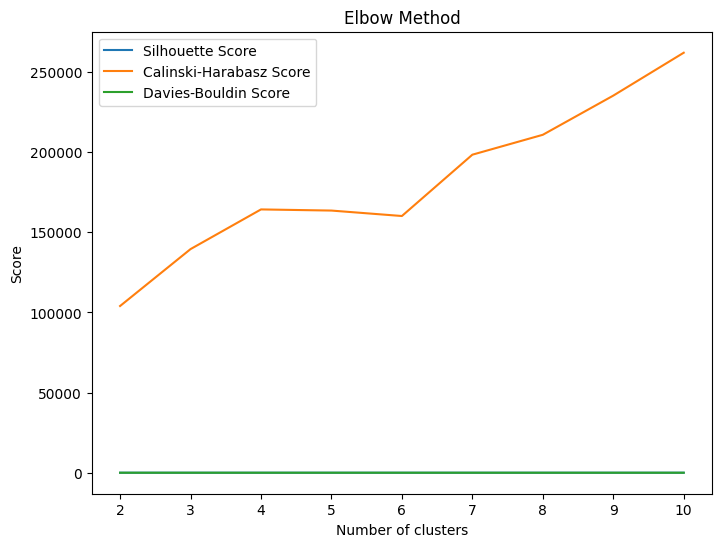

In [ ]:
# Elbow method to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, label='Silhouette Score')
plt.plot(range(2, 11), ch_scores, label='Calinski-Harabasz Score')
plt.plot(range(2, 11), db_scores, label='Davies-Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.legend()
plt.show()

In [ ]:
# Select the optimal number of clusters based on the Elbow method
optimal_clusters = sil_scores.index(max(sil_scores)) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 2


In [ ]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df2['cluster'] = labels

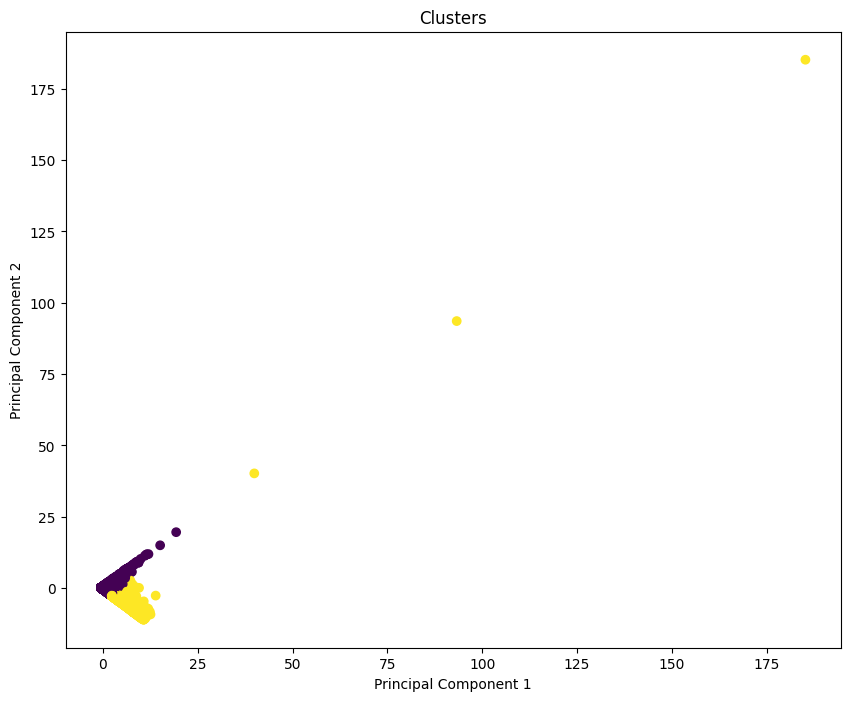

In [ ]:
# Cluster Analysis
# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df2['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.show()

In [ ]:
# Describe the characteristics of each cluster
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(df2[df2['cluster'] == cluster].describe())
    print()

Cluster 0:
              price       category       location     geo_region  \
count  1.572670e+05  157267.000000  157267.000000  157267.000000   
mean   2.350122e+06       4.613644     104.054309       4.855361   
std    5.011264e+06       2.404338      54.157327       6.046693   
min    1.000000e+00       0.000000       0.000000       0.000000   
25%    1.800000e+05       3.000000      64.000000       1.000000   
50%    5.100000e+05       6.000000     107.000000       2.000000   
75%    2.625000e+06       6.000000     150.000000       7.000000   
max    2.100000e+08       9.000000     203.000000      20.000000   

                area      is_member    is_verified  membership_level  \
count  157267.000000  157267.000000  157267.000000     157267.000000   
mean        7.863392       0.274972       0.176483          0.505510   
std         5.477862       0.446502       0.381232          0.839482   
min         0.000000       0.000000       0.000000          0.000000   
25%         4.00